# PyTorch
Biblioteka machine learning'owa, która dostarcza m. in. poniższe funkcjonalności:
*   szybkie operacje na tensorach, na CPU/GPU
*   automatyczne liczenie pochodnych - co jest niezbędne do trenowania sieci neuronowych
*   implementacje typowych "cegiełek" do budowy sieci neuronowych jak: warstwy sieci, optymalizatory, zbiory danych itp.

Materiały:
*   [learn the basics](https://pytorch.org/tutorials/beginner/basics/intro.html)





## Przykłady

In [1]:
import torch
import numpy as np

In [2]:
# torch.Tensor jest odpowiednikiem np.ndarray
data = [[1, 2], [3, 4]]
numpy_array = np.array(data)
torch_tensor = torch.tensor(data)  # list -> torch tensor
print(torch.tensor(numpy_array))  # numpy array -> torch tensor
print(torch_tensor.numpy())  # torch tensor -> numpy array

tensor([[1, 2],
        [3, 4]])
[[1 2]
 [3 4]]


In [3]:
# Widoki na podtablicę analogicznie jak w numpy
tensor = torch.ones(4, 4)
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])


In [4]:
# Operacje arytmetyczne analogicznie jak w numpy
a = torch.tensor([[1., 2.], [3., 4.]])
b = torch.tensor([[0., 1.], [1., 0.]])
print(a * b)
print(a @ b)
print(a + b)

tensor([[0., 2.],
        [3., 0.]])
tensor([[2., 1.],
        [4., 3.]])
tensor([[1., 3.],
        [4., 4.]])


In [5]:
# Liczenie pochodnych
# requires_grad jest wymagane dla zmiennych, po których będziemy liczyli pochodną.
# Daje to informację bibliotece, by zbudowała graf obliczeń dla liczenia pochodnych
# i zapisała dodatkowe potrzebne informacje.
x = torch.tensor(1., requires_grad=True)
y = 3 * x * x  # y <- x
y.backward()  # Liczymy pochodną
print(x.grad)

tensor(6.)


In [6]:
# Liczenie pochodnych - zmienna wielowymiarowa
c = 2 * torch.eye(3)  # torch.eye gives identity matrix
x = torch.randn(3, 3, requires_grad=True)  # x filled with Gaussian noise
y = (c @ x).sum()
y.backward()
print(x)
print(x.grad)

tensor([[-0.1542, -0.3520,  0.1765],
        [ 0.6382,  1.4767,  0.7025],
        [-0.9270, -0.8505,  2.7494]], requires_grad=True)
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


## Zadanie

**Zadanie 1.** *(20% punktów)* Proszę zaimplementować ponownie funkcję z zadań 1 i 2 (przerobić państwa implementację) z poprzedniego zestawu, tylko tym razem działającą na tensorach z PyTorcha, a nie tablicach NumPy.
Przypominam, że zabronione jest korzystanie z pythonowych pętli.

In [7]:
def normalize_rows(x):
    sum = torch.sum(torch.abs(x))
    return x / sum

def compute_euclidean_distances(A):
    # Expand the dimensions of A to compute the difference (A[i,k] - A[j,k])
    diff = A[:, None, :] - A[None, :, :]

    # Square the differences
    squared_diff = diff ** 2

    # Sum over the last axis (which corresponds to the summation over k)
    dist_matrix = torch.sum(squared_diff, axis=-1)

    # Take the square root to get the Euclidean distance
    return torch.sqrt(dist_matrix)

In [8]:
x = torch.tensor([
    [0,0],
    [1,1],
    [2,2],
    [1,2],
    [2,1]
])
print(x)
x = compute_euclidean_distances(x)
print(x)

tensor([[0, 0],
        [1, 1],
        [2, 2],
        [1, 2],
        [2, 1]])
tensor([[0.0000, 1.4142, 2.8284, 2.2361, 2.2361],
        [1.4142, 0.0000, 1.4142, 1.0000, 1.0000],
        [2.8284, 1.4142, 0.0000, 1.0000, 1.0000],
        [2.2361, 1.0000, 1.0000, 0.0000, 1.4142],
        [2.2361, 1.0000, 1.0000, 1.4142, 0.0000]])


# Regresja logistyczna

## Klasyfikacja

Dzisiaj na zajęciach zajmiemy się problemem klasyfikacji. Podobnie do regresji liniowej jest to przykład uczenia nadzorowanego, ale zamiast przewidywać konkretną liczbę dla danej obserwacji, przewidujemy jego przynależność do jednej z *k* klas. Na tych zajęciach będziemy rozważać klasyfikacje binarną, czyli uczyć modele odpowiadające funkcji:

$$ f(x) = y, \quad y \in \{0,1\} $$

## Regresja logistyczna jako model probabilistyczny
Regresja logistyczna zwraca nam dla danego przykładu $x$ i poszczególnych klas $y$ prawdopodobieństwa $p(y \mid x)$.

Stworzymy funkcję $g(x)$ taką, że $g(x)$ ma przybliżać $p(y = 1 \mid x)$. Wówczas $p(y = 0 \mid x) = 1 - g(x)$.

## Regresja logistyczna na podstawie regresji liniowej

**Problem:** Jak uzyskać probabilistyczny model klasyfikacyjny? Moglibyśmy użyć naszego modelu liniowego o postaci $f(x) = w^Tx + b$, ale ten model ma wadę, że może przyjmować dowolne wartości ze zbioru liczb rzeczywistych, tzn. $f(x) \in \mathbb{R}$, natomiast z definicji prawdopodobieństwo $p(y=1) \in [0, 1]$.

**Rozwiązanie:** Potrzebujemy więc funkcji, która "spłaszczy" nam przedział $\mathbb{R}$ do $[0, 1]$. Można by taką funkcję znaleźć na wiele sposobów, ale z powodów technicznych najczęściej korzysta się z sigmoidy, tzn.:
$$ \sigma(x) = \frac{1}{1 + \exp(-x)} $$

Zauważmy, że $x \geq 0 \iff \sigma(x) \geq 50\%$, więc nasz model będzie przewidywał pozytywną klasę (nr 1), gdy liczba która wchodzi do $\sigma$ jest równa co najmniej 0.

**Wykres funkcji sigmoid**

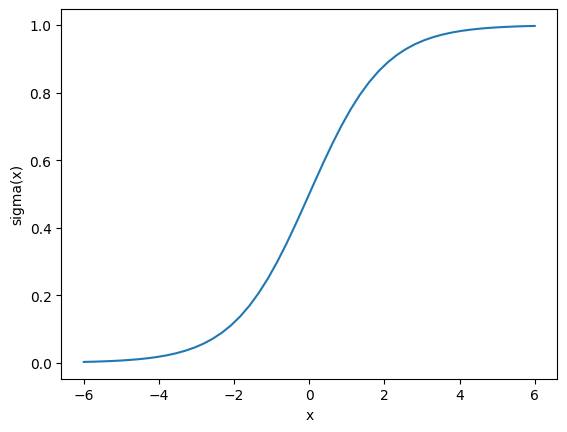

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.xlabel("x")
plt.ylabel("sigma(x)")
plt.plot(np.linspace(-6, 6), 1 / (1 + np.exp(-np.linspace(-6, 6))))

Ostatecznie nasz model wygląda tak:
$$
    \hat{p}(y = 1 \mid x) = \sigma(w^Tx + b)
$$

Mamy więc model, który jest w stanie dać nam rozkład prawdopodobieństwa etykiety pod warunkiem $\hat{p}(y \mid x)$. Nasz zbiór treningowy zawiera też próbki z prawdziwego rozkładu prawdopodobieństwa: $p(y_i \mid x_i)$.

Jako funkcję kosztu wybieramy sobie więc "różnicę" pomiędzy prawdziwym rozkładem, a rozkładem zadanym przez nasz model. W tym wypadku sprawdza się **entropia krzyżowa** (cross-entropy), zadana wzorem:


\begin{split}
      \mathcal{H}(p(y \mid x_i), \hat{p}(y \mid x_i)) &= -\sum_{k \in \{0, 1\}} p(y=k \mid x_i) \ln \hat{p}(y=k \mid x_i) \\
      &= -p(y = 0 \mid x_i) \ln \hat{p}(y = 0 \mid x_i) - p(y=1 \mid x_i) \ln \hat{p}(y=1 \mid x_i) \\
      &= -(1 - p(y = 1 \mid x_i)) \ln (1 - \hat{p}(y = 1 \mid x_i)) - p(y=1 \mid x_i) \ln \hat{p}(y=1 \mid x_i) \\
      &= - (1 - y_i) \ln (1 - \hat{y}) - y_i \ln \hat{y} ,
\end{split}
gdzie podstawiliśmy sobie: $$\hat{p}(y=1 \mid x_i) = \hat{y}, \\ p(y=1 \mid x_i) = y_i$$

Ustalmy teraz, że ostateczna funkcja kosztu naszego modelu to będzie średnia entropia krzyżowa dla zbioru danych:
$$
    \mathcal{L}(X) = \frac{1}{N} \sum_{(x_i, y_i) \in X}^N  \mathcal{H}(p(y \mid x_i), \hat{p}(y \mid x_i))
$$


Taki model możemy teraz optymalizować metodą spadku gradientu i wykorzystać do klasyfikacji.

## Zadanie

**Zadanie 2.** *(80% punktów)* Proszę zaimplementować w PyTorchu regresję logistyczną. W tym celu trzeba napisać następujące funkcje:
1. Funkcję kosztu modelu regresji logistycznej `loss(X, y)`, według następujących kroków:
    * Liczymy model liniowy $z = w^Tx + b$
    * Na wektorze $z$ uruchamiamy funkcję $\hat{y} = \sigma(z) = \frac{1}{1 + \exp(-z)}$.
    * Liczymy entropię krzyżową pomiędzy predykcjami $\hat{y}$ a etykietami $y$ zadaną przez:
    $\frac{1}{N} \sum_i - (1 - y_i) \ln (1 - \hat{y}_i) - y_i \ln \hat{y}_i$
2. Funkcję `predict_prob_positive(X)` zwracającą dla każdego $x_i \in X$ zadane przez nasz model prawdopodobieństwo $\hat{p}(y = 1 \mid x_i)$.
3. Funkcję `predict(X)` zwracającą dla każdego $x_i \in X$ przewidywaną etykietę (tzn. $0$ albo $1$).

Tensory wejściowe będą o następujących kształtach: $X$: kształt $(D, n)$; $y$: kształt $(D,)$ - gdzie D to rozmiar zbioru danych, a $n$ liczba cech.

**UWAGA** Nie można korzystać z funkcji PyTorcha do liczenia entropii krzyżowej (np. `torch.nn.BCELoss`) ani sigmoidy (np.`torch.nn.functional.Sigmoid`).

In [10]:
import torch
import matplotlib.pyplot as plt

In [139]:
class LogisticRegression:
    def __init__(self, input_dim):
        self.weight = None
        self.bias = None
        self.input_dim = input_dim

    def fit(self, X, y, lr=1e-3, num_steps=int(1e4)):
        self.weight = torch.randn(self.input_dim, requires_grad=True)
        self.bias = torch.randn((), requires_grad=True)

        for idx in range(num_steps):
            self.weight.requires_grad = True
            self.bias.requires_grad = True

            # Compute loss
            loss_val = self.loss(X, y)
            loss_val.backward()

            # Update parameters
            with torch.no_grad():
                self.weight -= lr * self.weight.grad
                self.bias -= lr * self.bias.grad

                # Zero gradients
                self.weight.grad.zero_()
                self.bias.grad.zero_()

            if (idx + 1) % 50 == 0:
                print(f"Epoch: {idx + 1}, Loss: {loss_val.item()}")

    def predict_prob_positive(self, X: torch.Tensor) -> torch.Tensor:
        with torch.no_grad():
            prediction = self.sigmoid(X @ self.weight + self.bias)
            return prediction

    def predict(self, X: torch.Tensor) -> torch.FloatTensor:
        probabilities = self.predict_prob_positive(X)
        return torch.round(probabilities)

    def sigmoid(self, z: torch.Tensor) -> torch.Tensor:
        return 1 / (1 + torch.exp(-z))

    def loss(self, X: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
        z = X @ self.weight + self.bias
        s = self.sigmoid(z)

        # epsilon = 1e-7
        # s = torch.clamp(s, epsilon, 1.0 - epsilon)

        cross_entropy = -torch.sum(y * torch.log(s) + (1 - y) * torch.log(1 - s)) / X.size()[0]

        return cross_entropy


Epoch: 50, Loss: 0.8212330341339111
Epoch: 100, Loss: 0.4040006995201111
Epoch: 150, Loss: 0.2644543945789337
Epoch: 200, Loss: 0.1993284672498703
Epoch: 250, Loss: 0.16112367808818817
Epoch: 300, Loss: 0.13599638640880585
Epoch: 350, Loss: 0.1183578372001648
Epoch: 400, Loss: 0.10542459785938263
Epoch: 450, Loss: 0.0956340953707695
Epoch: 500, Loss: 0.08804243057966232
Epoch: 550, Loss: 0.08204708248376846
Epoch: 600, Loss: 0.07724579423666
Epoch: 650, Loss: 0.07335936278104782
Epoch: 700, Loss: 0.07018730044364929
Epoch: 750, Loss: 0.06758125126361847
Epoch: 800, Loss: 0.06542877852916718
Epoch: 850, Loss: 0.06364277005195618
Epoch: 900, Loss: 0.062154389917850494
Epoch: 950, Loss: 0.06090865284204483
Epoch: 1000, Loss: 0.05986104905605316
Epoch: 1050, Loss: 0.058975402265787125
Epoch: 1100, Loss: 0.05822211876511574
Epoch: 1150, Loss: 0.05757691711187363
Epoch: 1200, Loss: 0.05702003464102745
Epoch: 1250, Loss: 0.05653531476855278
Epoch: 1300, Loss: 0.05610949546098709
Epoch: 1350, 

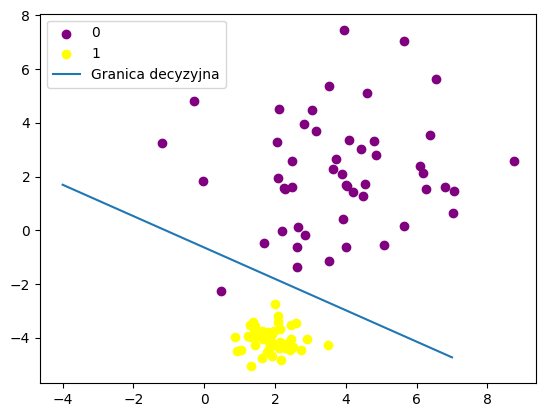

In [140]:
# Kod do sprawdzenia i wizualizacji rozwiązania

def get_classification_dataset_2d():
    torch.manual_seed(4)
    X = torch.cat([
        torch.randn(50, 2) * 2 + torch.tensor([4., 2.]),
        torch.randn(50, 2) * 0.5 + torch.tensor([2., -4.]),
    ])

    y = torch.cat([torch.zeros(50), torch.ones(50)])
    return X, y


def plot_dataset_2d(logistic_reg, X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c="purple", label="0")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c="yellow", label="1")

    linspace_x = torch.linspace(-4, 7, 30)
    linspace_y = (-logistic_reg.bias - logistic_reg.weight[0] * linspace_x) / logistic_reg.weight[1]  # solving for wx + b = 0

    linspace_y = linspace_y.detach().numpy()
    plt.plot(linspace_x.detach().numpy(), linspace_y, label="Granica decyzyjna")
    plt.legend()


def calculate_accuracy(logistic_reg, X, y):
    preds = logistic_reg.predict(X)
    correct_n = (preds == y).float().sum().item()
    return correct_n / len(y)


X, y = get_classification_dataset_2d()

logistic_reg = LogisticRegression(input_dim=2)
logistic_reg.fit(X, y, lr=1e-2, num_steps=int(20000))
acc = calculate_accuracy(logistic_reg, X, y)
print("Training accuracy: ", acc)

plot_dataset_2d(logistic_reg, X, y)

# Częściowe rozpisanie pochodnych

Poniższe rozpisanie dotyczy 1 przykładu treningowego

$z_i$ - aktywacja po i-tej warstwie, przed wzięciem relu

$a_i$ - aktywacja po i-tej warstwie, po wzięciu relu

$a_{i-1} = relu(z_{i-1})$

$z_i = a_{i-1}w_{i-1} + b_{i-1}$

$\frac{\partial l}{\partial a_{i-1}} = \frac{\partial l}{\partial z_{i}} \frac{\partial z_i}{\partial a_{i-1}} = \frac{\partial l}{\partial z_{i}}w_{i-1}^T$

$\frac{\partial l}{\partial z_{i-1}} = \frac{\partial l}{\partial a_{i-1}}\frac{\partial a_{i-1}}{\partial z_{i-1}} = \frac{\partial l}{\partial a_{i-1}} \bigodot \mathbb{1}(z_{i-1} > 0)$